In [1]:
import os
import pylab
import numpy as np
import scipy
import astropy
from astropy.io import fits
import pandas as pd
%matplotlib inline

In [2]:
dataDF = pd.read_csv("ptc.txt", delim_whitespace=True)

In [3]:
dataDF

,Signal,Variance
0,275.260192,23.079918
1,342.791237,27.173086
2,411.147845,31.575360
3,479.755667,40.613631
4,548.936967,41.492794
5,618.789866,50.806422
6,688.097276,54.615642
7,689.919975,79.768601
8,828.039112,65.334356
9,901.208544,74.662478


In [4]:
(m,b) = np.polyfit(dataDF["Signal"], dataDF["Variance"], 1)

In [5]:
m

0.08750105013019624

In [6]:
measuredElectronPerDN = 1/m
measuredElectronPerDN

11.428434270355165

In [7]:
gain = 2
adcRange = 4.0
adcMax = 2**16
DNperVolt = adcMax/(adcRange/gain)
DNperMuVolt = DNperVolt/10**6
muVoltPerDN = 1.0/DNperMuVolt
muVoltPerDN

30.517578125

In [8]:
muVoltPerElectron = 2.4
expectedElectronPerDN= muVoltPerDN/muVoltPerElectron
expectedElectronPerDN

12.715657552083334

In [9]:
expectedElectronPerDN - measuredElectronPerDN

1.2872232817281688

In [10]:
from matplotlib import pyplot as plt

In [11]:
plt.figure()
xrange = np.arange(200,1300,100)

In [12]:
xrange

array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200])

In [13]:
yrange = xrange* m +b

In [14]:
yrange

array([  16.19058796,   24.94069298,   33.69079799,   42.440903  ,
         51.19100802,   59.94111303,   68.69121804,   77.44132306,
         86.19142807,   94.94153308,  103.69163809])

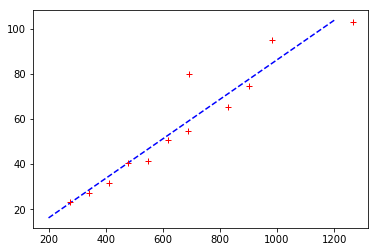

In [15]:
plt.plot(xrange,yrange, 'b--', dataDF["Signal"], dataDF["Variance"], 'r+' )

In [16]:
import os
FH = open('../demo4noah/int5sec/demo4noah_1100x1100_59.raw','r')

In [17]:
a3=np.fromfile(FH, dtype=np.uint16)

In [19]:
a3[0:16]

array([155, 129, 127, 130, 128, 132, 130, 129, 128, 131, 130, 129, 131,
       132, 132, 131], dtype=uint16)

In [21]:
a3.dtype

dtype('uint16')

In [40]:
a4=np.reshape(a3, (1100,1100))

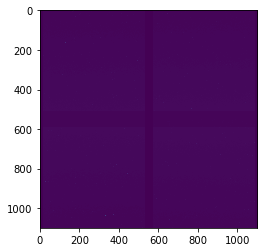

In [43]:
plt.imshow(a4)